In [ ]:
# Install necessary libraries
!pip install pandas matplotlib geopy scikit-lear

ERROR: Could not find a version that satisfies the requirement scikit-lear (from versions: none)
ERROR: No matching distribution found for scikit-lear


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Mount the Google Drive (optional, if you have the file in Google Drive)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/NYC Taxi Data.csv' # Update this path
df = pd.read_csv(file_path)


In [ ]:
# Function to calculate distance between pickup and dropoff points (in kilometers)
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).kilometers


In [ ]:

# Calculate the distance in kilometers for each trip
df['distance_km'] = df.apply(calculate_distance, axis=1) # Changed 'data' to 'df'

# Convert pickup_datetime to datetime format and extract useful time features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) # Changed 'data' to 'df'
df['pickup_hour'] = df['pickup_datetime'].dt.hour # Changed 'data' to 'df'
df['pickup_day'] = df['pickup_datetime'].dt.day # Changed 'data' to 'df'
df['pickup_month'] = df['pickup_datetime'].dt.month # Changed 'data' to 'df'
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek # Changed 'data' to 'df'

# Features to use for prediction
features = ['distance_km', 'passenger_count', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_dayofweek']

# Define X (independent variables) and y (dependent variable)
X = df[features] # Changed 'data' to 'df'
y = df['trip_duration'] # Changed 'data' to 'df'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Mean Squared Error: 10328194.376256602
R-squared Score: 0.024891540373915277


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


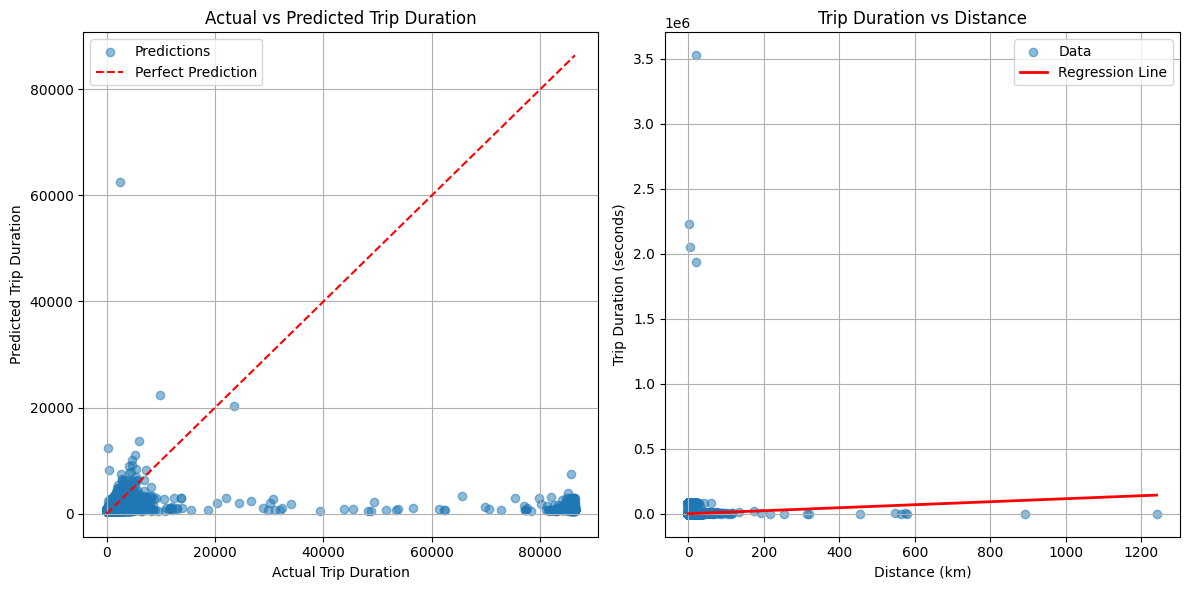

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Scatter plot of actual vs predicted trip durations with a line of equality
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual vs Predicted Trip Duration')
plt.legend()
plt.grid(True)

# Scatter plot of trip_duration vs distance_km with the regression line
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
X_distance = df[['distance_km']] # Changed 'data' to 'df'
y_duration = df['trip_duration'] # Changed 'data' to 'df'
model_distance = LinearRegression()
model_distance.fit(X_distance, y_duration)
x_range = np.linspace(X_distance['distance_km'].min(), X_distance['distance_km'].max(), 100).reshape(-1, 1)
y_pred_line = model_distance.predict(x_range)
plt.scatter(df['distance_km'], df['trip_duration'], alpha=0.5, label='Data') # Changed 'data' to 'df'
plt.plot(x_range, y_pred_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration vs Distance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()